<a href="https://colab.research.google.com/github/EricSiq/EricSiq/blob/main/benchmarkingports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
pip install streamlit

In [202]:
import streamlit as st


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import ipywidgets as widgets
from IPython.display import display, clear_output


loading csv files


In [ ]:
trt_df = pd.read_csv('/content/TRT.csv')
traffic_df = pd.read_csv('/content/traffic.csv')
capacity_df = pd.read_csv('/content/capacity.csv')
utilization_df = pd.read_csv('/content/utilization.csv')
pre_berthing_df = pd.read_csv('/content/pre-berthing detention.csv')
output_df = pd.read_csv('/content/Output-per-Ship-Berth-Day.csv')

Inspect the Data

In [ ]:
# Inspect the first few rows of each dataset
print(trt_df.head())
print(traffic_df .head())
print(capacity_df.head())
print(utilization_df.head())
print(pre_berthing_df.head())
print(output_df.head())


      Year  Kolkata   Haldia   Paradip  Vishakhapatnam  Ennore  Chennai  \
0  2004-05      4.17     4.05     3.41            3.20    1.72     3.94   
1  2005-06      4.12     4.89     3.56            3.79    2.23     3.32   
2  2006-07      4.38     3.85     3.54            3.65    1.89     3.36   
3  2007-08      5.46     4.26     5.54            3.91    2.08     4.55   
4  2008-09      5.10     4.21     4.78            3.93    2.35     4.15   

   Tuticorin  Cochin  New Mangalore  Mormugoa  J.L.Nehru  Mumbai  Kandla  \
0       2.66    2.62           2.96      5.66       1.94    4.21    4.62   
1       2.83    2.70           3.00      6.06       1.97    4.06    4.39   
2       3.67    2.17           3.14      6.15       1.43    4.63    5.46   
3       3.85    1.94           3.21      6.24       1.80    4.07    5.13   
4       3.64    2.14           3.00      5.95       1.90    4.95    7.26   

   All Ports  
0       3.54  
1       3.63  
2       3.65  
3       3.98  
4       4.20  
  

In [ ]:
def clean_dataframe(df):
    # Strip spaces from column names
    df.columns = df.columns.str.strip()

    # Apply string cleanup to all columns
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Remove leading/trailing spaces from string values
    df = df.applymap(lambda x: x.replace(" ", "") if isinstance(x, str) else x)  # Remove all spaces from strings

    return df

# Apply cleaning function to all DataFrames
trt_df = clean_dataframe(trt_df)
traffic_df = clean_dataframe(traffic_df)
capacity_df = clean_dataframe(capacity_df)
utilization_df = clean_dataframe(utilization_df)
pre_berthing_df = clean_dataframe(pre_berthing_df)
output_df = clean_dataframe(output_df)

<ipython-input-615-e533b0df23db>:6: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-615-e533b0df23db>:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-615-e533b0df23db>:6: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-615-e533b0df23db>:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-615-e533b0df23db>:6: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-615-e533b0df23db>:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-615-e533b0df23db>:6: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-615-e533b0df23db>:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-615-e533b0df23db>:6: Futu

checking for missing value


In [ ]:
# Check for missing values in each dataset
print(trt_df.isnull().sum())
print(traffic_df.isnull().sum())
print(capacity_df.isnull().sum())
print(utilization_df.isnull().sum())
print(pre_berthing_df.isnull().sum())
print(output_df.isnull().sum())


Year              0
Kolkata           0
Haldia            0
Paradip           0
Vishakhapatnam    0
Ennore            0
Chennai           0
Tuticorin         0
Cochin            0
New Mangalore     0
Mormugoa          0
J.L.Nehru         0
Mumbai            0
Kandla            0
All Ports         0
dtype: int64
Year              0
Kolkata           0
Haldia            0
Paradip           0
Vishakhapatnam    0
Ennore            0
Chennai           0
Tuticorin         0
Cochin            0
New Mangalore     0
Mormugoa          0
J.L.Nehru         0
Mumbai            0
Kandla            0
All Ports         0
dtype: int64
Year              0
Kolkata           0
Haldia            0
Paradip           0
Vishakhapatnam    0
Ennore            0
Chennai           0
Tuticorin         0
Cochin            0
New Mangalore     0
Mormugoa          0
J.L.Nehru         0
Mumbai            0
Kandla            0
All Ports         0
dtype: int64
Year              0
Kolkata           0
Haldia            0
P

Exploratory Data Analysis

Statistical Analysis for a Port

In [ ]:
def analyze_port_statistics(port_name):
    if port_name not in capacity_df.columns:
        print(f"Port {port_name} not found in data.")
        return pd.DataFrame()

    # Extract yearly statistics for the port
    stats_df = pd.DataFrame({
        'Year': capacity_df['Year'],
        'Capacity': capacity_df[port_name],
        'Traffic': traffic_df[port_name],
        'Utilization': utilization_df[port_name]
    })

    # Calculate year-over-year growth rates and moving averages
    stats_df['Capacity_Growth'] = stats_df['Capacity'].pct_change() * 100
    stats_df['Traffic_Growth'] = stats_df['Traffic'].pct_change() * 100
    stats_df['Utilization_MA'] = stats_df['Utilization'].rolling(window=3).mean()

    return stats_df

In [ ]:
stats_kolkata =analyze_port_statistics('Kolkata')
stats_haldia =analyze_port_statistics('Haldia')
stats_paradip =analyze_port_statistics('Paradip')
stats_vishakhapatnam =analyze_port_statistics('Vishakhapatnam')
stats_ennore =analyze_port_statistics('Ennore')
stats_chennai = analyze_port_statistics('Chennai')
stats_tuticorin = analyze_port_statistics('Tuticorin')
stats_cochin = analyze_port_statistics('Cochin')
stats_new_mangalore = analyze_port_statistics('New Mangalore')
stats_mormugao = analyze_port_statistics('Mormugoa')
stats_jln = analyze_port_statistics('J.L.Nehru')
stats_mumbai = analyze_port_statistics('Mumbai')
stats_kandla = analyze_port_statistics('Kandla')


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Assuming the function analyze_port_statistics and relevant DataFrames (capacity_df, traffic_df, utilization_df) are defined

# Define the port-to-statistics mapping
port_options = {
    'Kolkata': stats_kolkata,
    'Haldia': stats_haldia,
    'Paradip': stats_paradip,
    'Vishakhapatnam': stats_vishakhapatnam,
    'Ennore': stats_ennore,
    'Chennai': stats_chennai,
    'Tuticorin': stats_tuticorin,
    'Cochin': stats_cochin,
    'New Mangalore': stats_new_mangalore,
    'Mormugoa': stats_mormugao,
    'J.L.Nehru': stats_jln,
    'Mumbai': stats_mumbai,
    'Kandla': stats_kandla
}

# Create a dropdown widget for selecting a port
port_dropdown = widgets.Dropdown(
    options=list(port_options.keys()),
    description='Select Port:',
    disabled=False
)

# Create an output widget to display the statistics
output = widgets.Output()

def on_port_change(change):
    with output:
        clear_output()  # Clear previous output
        selected_port = change['new']  # Get the selected port
        display(f"Statistics for {selected_port}:")  # Display the title for the selected port

        # Get the selected port's statistics
        stats_data = port_options.get(selected_port)

        if not stats_data.empty:
            # Display the statistics DataFrame in a readable format
            display(stats_data)
        else:
            print("No statistics available for this port.")

# Set up the observer for the dropdown change event
port_dropdown.observe(on_port_change, names='value')

# Display the dropdown and output widgets
display(port_dropdown)
display(output)


Dropdown(description='Select Port:', options=('Kolkata', 'Haldia', 'Paradip', 'Vishakhapatnam', 'Ennore', 'Che…

Output()

Metric Trend Plotting

In [ ]:
def plot_metric_trends(df, metric_name):
    plt.figure(figsize=(10, 6))
    for port in [col for col in df.columns if col not in ['Year', 'All Ports']]:
        plt.plot(df['Year'], df[port], label=port)
    plt.title(f'{metric_name} Trends Across Ports')
    plt.xlabel('Year')
    plt.ylabel(metric_name)
    plt.legend(loc='best')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

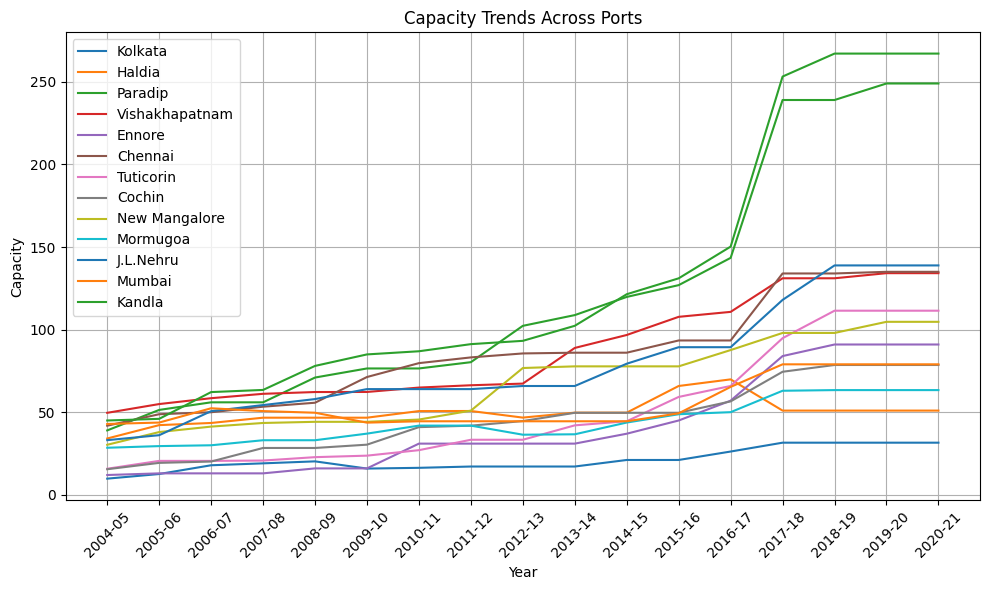

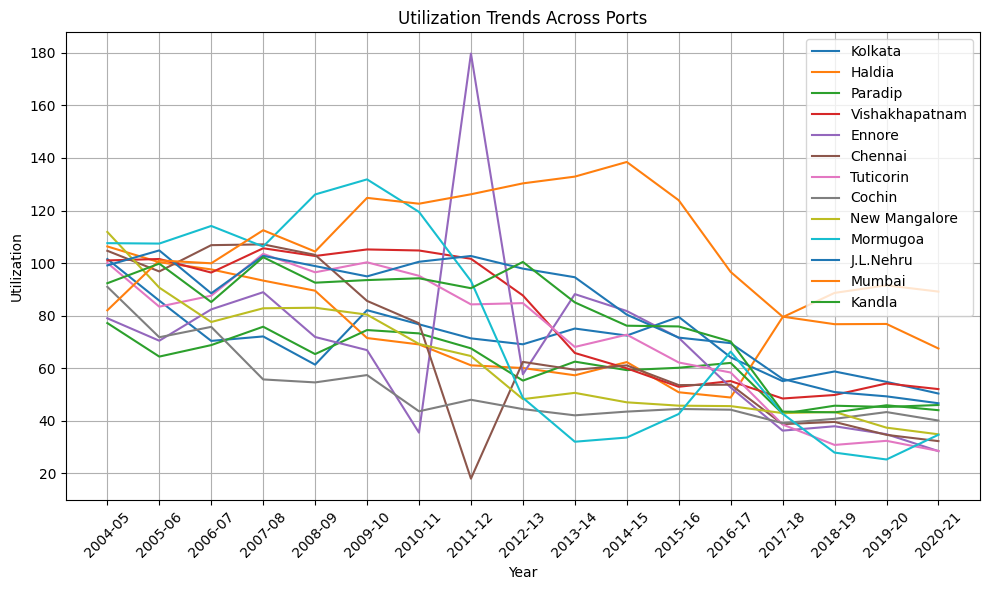

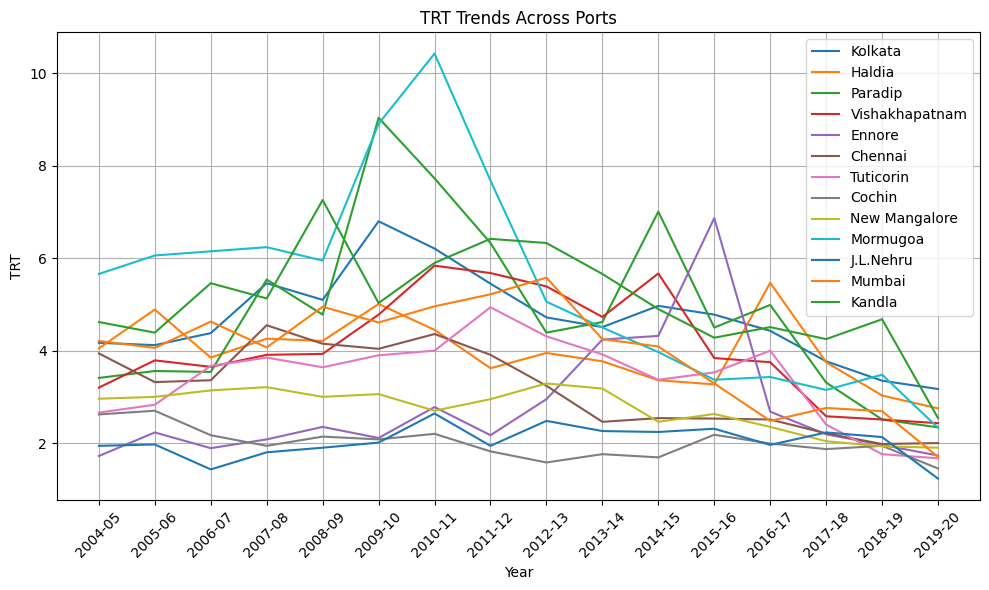

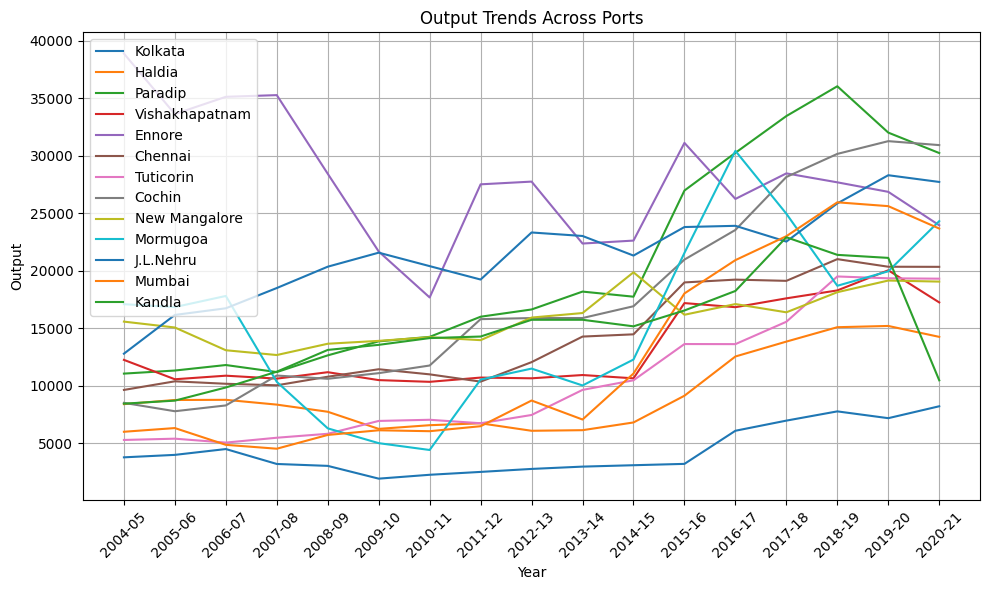

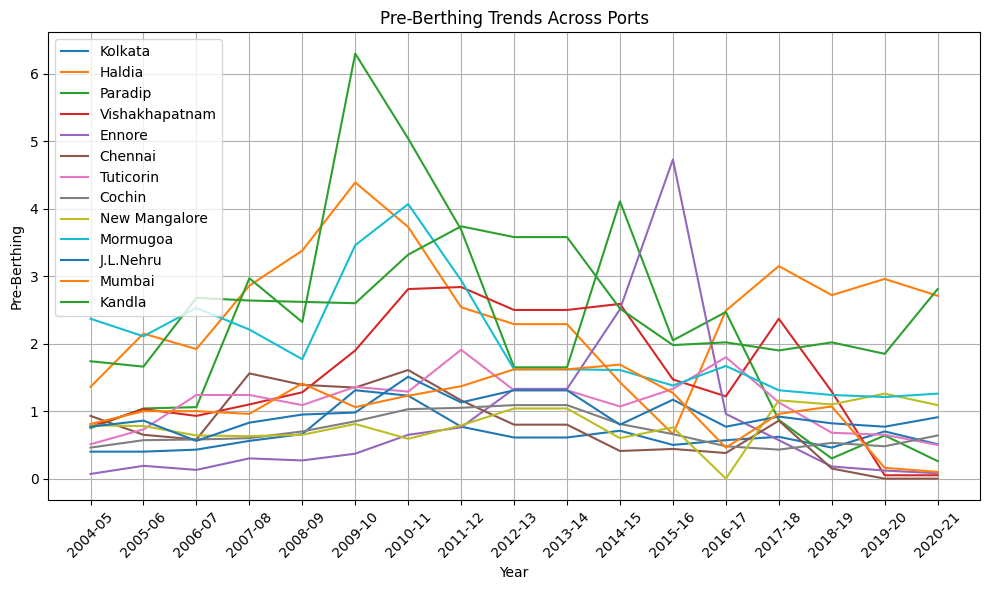

In [ ]:
plot_metric_trends(capacity_df, 'Capacity')
plot_metric_trends(utilization_df, 'Utilization')
plot_metric_trends(trt_df, 'TRT')
plot_metric_trends(output_df, 'Output')
plot_metric_trends(pre_berthing_df, 'Pre-Berthing')

Port Correlation Analysis

In [ ]:
def analyze_port_correlations(port_name):
    if port_name not in capacity_df.columns:
        print(f"Port {port_name} not found in data.")
        return pd.DataFrame()

    correlation_df = pd.DataFrame({
        'Capacity': capacity_df[port_name],
        'Traffic': traffic_df[port_name],
        'Utilization': utilization_df[port_name],
        'TRT': trt_df[port_name],
        'Output': output_df[port_name]
    })

    return correlation_df.corr()

In [ ]:
corr_kolkata = analyze_port_correlations('Kolkata')
corr_haldia = analyze_port_correlations('Haldia')
corr_paradip = analyze_port_correlations('Paradip')
corr_vishakhapatnam = analyze_port_correlations('Vishakhapatnam')
corr_ennore = analyze_port_correlations('Ennore')
corr_chennai = analyze_port_correlations('Chennai')
corr_tuticorin = analyze_port_correlations('Tuticorin')
corr_cochin = analyze_port_correlations('Cochin')
corr_new_mangalore = analyze_port_correlations('New Mangalore')
corr_mormugao = analyze_port_correlations('Mormugoa')
corr_jln = analyze_port_correlations('J.L.Nehru')
corr_mumbai = analyze_port_correlations('Mumbai')
corr_kandla = analyze_port_correlations('Kandla')

In [ ]:
# Define the port-to-correlation mapping
port_options = {
    'Kolkata': corr_kolkata,
    'Haldia': corr_haldia,
    'Paradip': corr_paradip,
    'Vishakhapatnam': corr_vishakhapatnam,
    'Ennore': corr_ennore,
    'Chennai': corr_chennai,
    'Tuticorin': corr_tuticorin,
    'Cochin': corr_cochin,
    'New Mangalore': corr_new_mangalore,
    'Mormugoa': corr_mormugao,
    'J.L.Nehru': corr_jln,
    'Mumbai': corr_mumbai,
    'Kandla': corr_kandla
}

# Create a dropdown widget
port_dropdown = widgets.Dropdown(
    options=list(port_options.keys()),
    description='Select Port:',
    disabled=False
)

# Create an output widget to display the correlation data
output = widgets.Output()

def on_port_change(change):
    with output:
        clear_output()

        # Get the selected port
        selected_port = change['new']

        # Display the title for the selected port
        print(f"Correlation Analysis for {selected_port}:")

        # Check if the selected port has correlation data available
        correlation_data = port_options.get(selected_port)

        if correlation_data is not None:
            # Display the correlation data in a table format for better readability
            display(correlation_data)
        else:
            print("No correlation data available for this port.")

# Set up the observer for the dropdown change
port_dropdown.observe(on_port_change, names='value')

# Display the dropdown and output widgets
display(port_dropdown)
display(output)


Dropdown(description='Select Port:', options=('Kolkata', 'Haldia', 'Paradip', 'Vishakhapatnam', 'Ennore', 'Che…

Output()

Port Comparison Visualization

In [ ]:
def plot_port_comparison(metric_df, year, metric_name):
    year_data = metric_df[metric_df['Year'] == year].melt(
        id_vars=['Year'],
        value_vars=[col for col in metric_df.columns if col not in ['Year', 'All Ports']]
    )

    plt.figure(figsize=(15, 6))
    sns.barplot(x='variable', y='value', data=year_data)
    plt.title(f'{metric_name} Comparison Across Ports ({year})')
    plt.xticks(rotation=45)
    plt.xlabel('Ports')
    plt.ylabel(metric_name)
    plt.tight_layout()
    plt.show()

In [ ]:
year_dropdown = widgets.Dropdown(
    options=[str(year) for year in capacity_df['Year'].unique()],
    description='Select Year:',
    disabled=False
)
output = widgets.Output()

# Function to update the plot based on the selected year
def update_plot(year):
    # Call plot_port_comparison for each feature
    plt.figure(figsize=(15, 6))
    plot_port_comparison(capacity_df, year, 'Capacity')
    plot_port_comparison(traffic_df, year, 'Traffic')
    plot_port_comparison(utilization_df, year, 'Utilization')
    plot_port_comparison(trt_df, year, 'TRT')
    plot_port_comparison(output_df, year, 'Output')
    plot_port_comparison(pre_berthing_df, year, 'Pre-Berthing')

# Bind the year dropdown to the update_plot function
year_dropdown.observe(lambda change: update_plot(change['new']), names='value')

# Display the dropdown and output area
display(year_dropdown, output)



Dropdown(description='Select Year:', options=('2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10'…

Output()

How does Turn Round Time (TRT) vary across major ports, and which ports consistently show the best performance?

In [ ]:
def analyze_trt_performance(trt_df):
    # Calculate average TRT for each port
    port_cols = [col for col in trt_df.columns if col not in ['Year', 'All Ports']]
    avg_trt = trt_df[port_cols].mean().sort_values()

    # Calculate TRT trend (improvement rate)
    trt_trend = trt_df[port_cols].apply(lambda x: stats.linregress(range(len(x)), x)[0])

    # Create performance summary
    performance_summary = pd.DataFrame({
        'Average_TRT': avg_trt,
        'TRT_Trend': trt_trend
    })

    # Plot average TRT comparison
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_trt.index, y=avg_trt.values)
    plt.title('Average Turn Round Time by Port')
    plt.xticks(rotation=45)
    plt.ylabel('Average TRT (days)')
    plt.xlabel('Port')
    plt.tight_layout()
    plt.show()

    return performance_summary

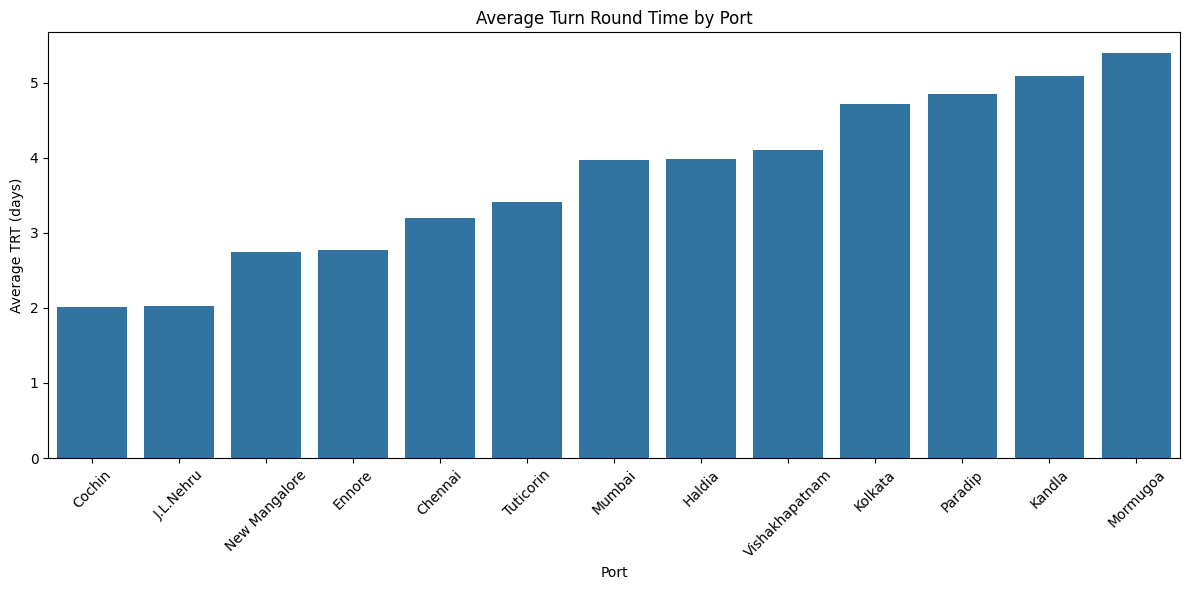

,Average_TRT,TRT_Trend
Chennai,3.193750,-0.151088
Cochin,2.008125,-0.049279
Ennore,2.766875,0.078221
Haldia,3.980625,-0.074162
J.L.Nehru,2.029375,0.007485
Kandla,5.085000,-0.100941
Kolkata,4.711875,-0.085603
Mormugoa,5.398125,-0.301397
Mumbai,3.971875,-0.156368
New Mangalore,2.737500,-0.078618


In [ ]:
analyze_trt_performance(trt_df)

What is the relationship between pre-berthing detention times and overall port efficiency?

In [ ]:
def analyze_efficiency_correlation(pre_berthing_df, output_df, trt_df):

    port_cols = [col for col in pre_berthing_df.columns if col not in ['Year', 'All Ports']]

    correlations = {}
    for port in port_cols:
        corr_data = pd.DataFrame({
            'TRT': trt_df[port],
            'Pre_Berthing': pre_berthing_df[port],
            'Output': output_df[port]
        })
        correlations[port] = corr_data.corr()['Pre_Berthing']

    correlation_df = pd.DataFrame(correlations).T

    # Visualize correlations
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation between Pre-Berthing Detention and Efficiency Metrics')
    plt.tight_layout()
    plt.show()

    return correlation_df

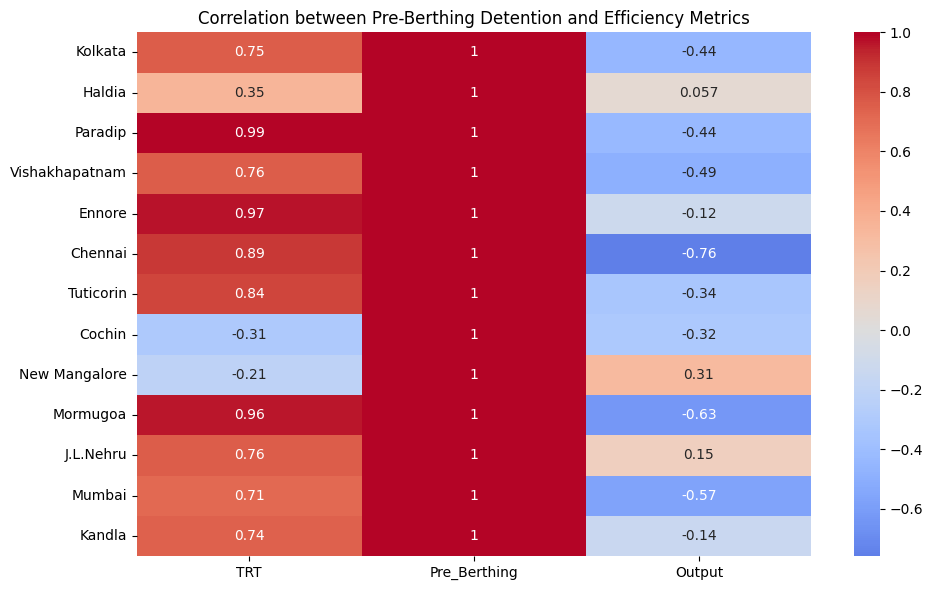

,TRT,Pre_Berthing,Output
Kolkata,0.754548,1.0,-0.443317
Haldia,0.349307,1.0,0.057067
Paradip,0.990834,1.0,-0.436064
Vishakhapatnam,0.761658,1.0,-0.492757
Ennore,0.968578,1.0,-0.116717
Chennai,0.887044,1.0,-0.759365
Tuticorin,0.843416,1.0,-0.339212
Cochin,-0.306676,1.0,-0.316984
New Mangalore,-0.214481,1.0,0.312934
Mormugoa,0.963042,1.0,-0.633958


In [ ]:
analyze_efficiency_correlation(pre_berthing_df, output_df, trt_df)

How does output per ship berth day compare across ports of similar size/capacity?

In [ ]:
def analyze_output_efficiency(output_df, capacity_df):
    """Analyzes output per ship berth day relative to port capacity"""
    port_cols = [col for col in output_df.columns if col not in ['Year', 'All Ports']]

    # Calculate average output and capacity
    avg_output = output_df[port_cols].mean()
    avg_capacity = capacity_df[port_cols].mean()

    # Calculate efficiency ratio (output per unit capacity)
    efficiency_ratio = (avg_output / avg_capacity).sort_values(ascending=False)

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(avg_capacity, avg_output)

    # Add port labels
    for i, port in enumerate(port_cols):
        plt.annotate(port, (avg_capacity[port], avg_output[port]))

    plt.xlabel('Average Capacity')
    plt.ylabel('Average Output per Ship Berth Day')
    plt.title('Port Output Efficiency vs Capacity')
    plt.tight_layout()
    plt.show()

    return efficiency_ratio

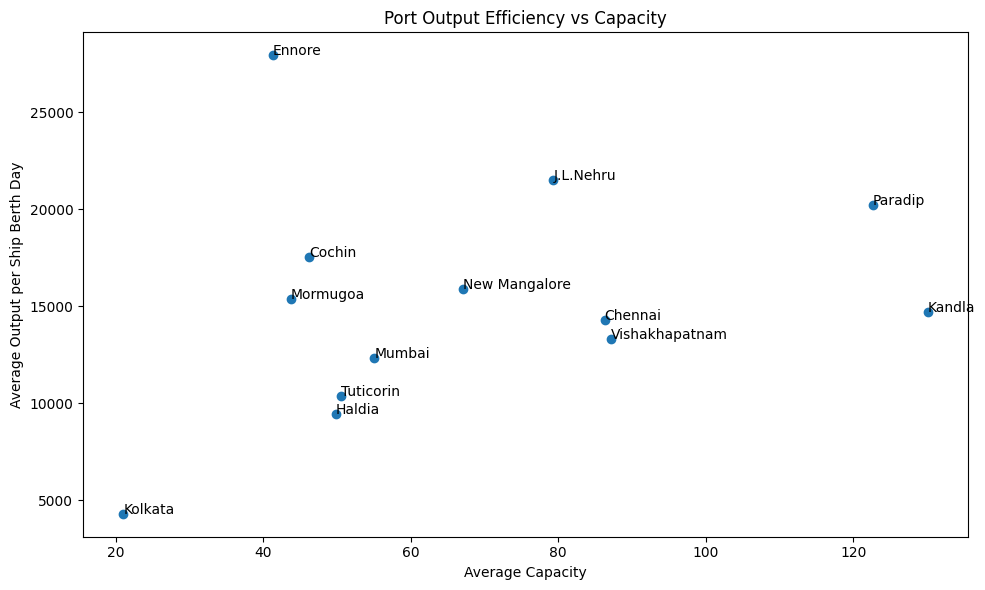

,0
Ennore,675.822191
Cochin,379.781275
Mormugoa,352.104761
J.L.Nehru,270.931983
New Mangalore,236.697015
Mumbai,224.248767
Tuticorin,205.135758
Kolkata,204.866194
Haldia,189.480516
Chennai,166.042290


In [ ]:
analyze_output_efficiency(output_df, capacity_df)


Which ports are operating closest to their optimal capacity utilization rates?

In [ ]:
def analyze_capacity_utilization(utilization_df):

    port_cols = [col for col in utilization_df.columns if col not in ['Year', 'All Ports']]

    # Calculate average and variability in utilization
    util_stats = pd.DataFrame({
        'Mean_Utilization': utilization_df[port_cols].mean(),
        'Std_Utilization': utilization_df[port_cols].std(),
        'Max_Utilization': utilization_df[port_cols].max(),
        'Min_Utilization': utilization_df[port_cols].min()
    }).sort_values('Mean_Utilization', ascending=False)

    # Plot utilization ranges
    plt.figure(figsize=(12, 6))
    for port in util_stats.index:
        plt.vlines(x=port,
                  ymin=util_stats.loc[port, 'Min_Utilization'],
                  ymax=util_stats.loc[port, 'Max_Utilization'],
                  color='gray', alpha=0.5)
        plt.plot(port, util_stats.loc[port, 'Mean_Utilization'], 'bo')

    plt.xticks(rotation=45)
    plt.ylabel('Utilization Rate (%)')
    plt.title('Port Capacity Utilization Ranges')
    plt.tight_layout()
    plt.show()

    return util_stats


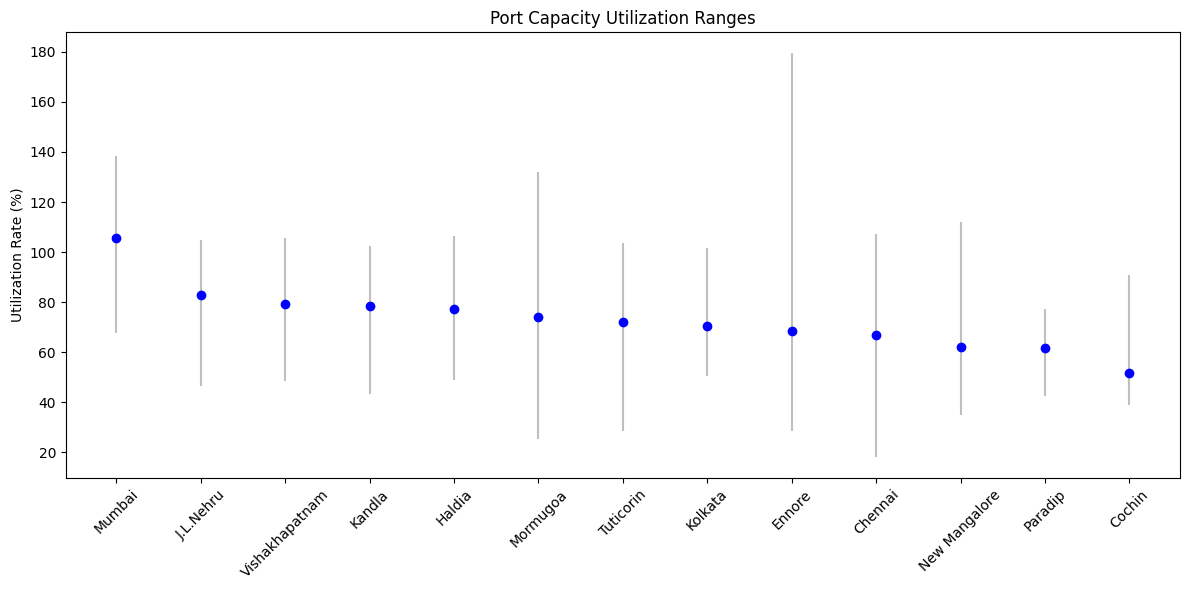

,Mean_Utilization,Std_Utilization,Max_Utilization,Min_Utilization
Mumbai,105.668824,22.882541,138.47,67.50
J.L.Nehru,82.885882,21.119482,104.82,46.67
Vishakhapatnam,79.111176,24.263163,105.64,48.47
Kandla,78.504118,21.498555,102.24,43.20
Haldia,77.462353,18.473595,106.33,48.85
Mormugoa,74.108824,39.921180,131.85,25.27
Tuticorin,72.190000,26.193659,103.52,28.52
Kolkata,70.617059,12.820761,101.53,50.36
Ennore,68.475882,35.218589,179.71,28.45
Chennai,66.741176,29.512608,107.12,17.98


In [ ]:
analyze_capacity_utilization(utilization_df)

 How has capacity expansion affected port performance metrics over time?


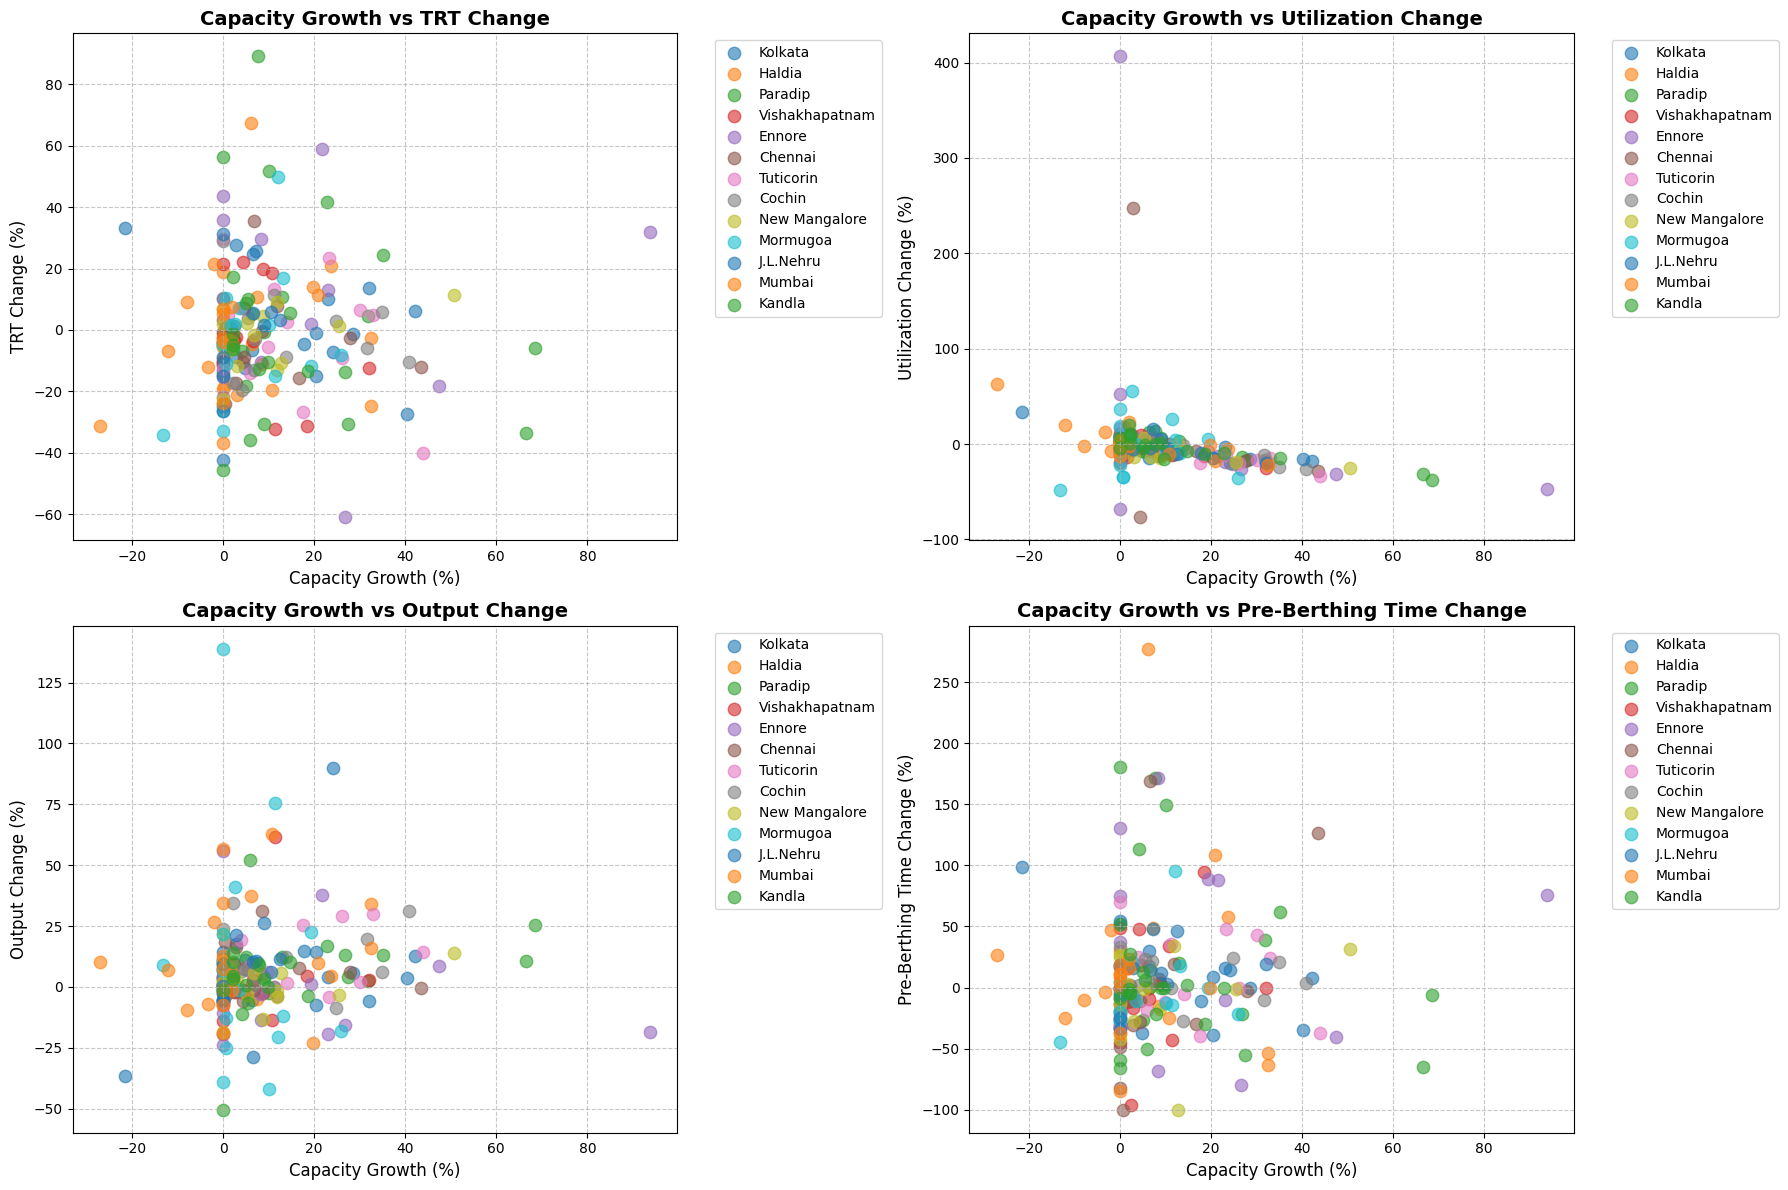

In [ ]:
def analyze_capacity_impact(capacity_df, trt_df, utilization_df, output_df, pre_berthing_df):
    # Calculate year-over-year capacity growth
    capacity_growth = capacity_df.copy()
    for column in capacity_growth.columns:
        if column != 'Year':
            capacity_growth[column] = capacity_growth[column].pct_change() * 100

    # Function to calculate year-over-year change for each metric
    def calculate_metric_change(df):
        metric_change = df.copy()
        for column in metric_change.columns:
            if column != 'Year':
                metric_change[column] = metric_change[column].pct_change() * 100
        return metric_change

    # Calculate changes in each performance metric
    trt_change = calculate_metric_change(trt_df)
    utilization_change = calculate_metric_change(utilization_df)
    output_change = calculate_metric_change(output_df)
    pre_berthing_change = calculate_metric_change(pre_berthing_df)

    # Visualization setup for capacity growth vs. metric changes
    plt.figure(figsize=(18, 12))
    plots = [
        (trt_change, 'TRT Change (%)', 'Capacity Growth vs TRT Change'),
        (utilization_change, 'Utilization Change (%)', 'Capacity Growth vs Utilization Change'),
        (output_change, 'Output Change (%)', 'Capacity Growth vs Output Change'),
        (pre_berthing_change, 'Pre-Berthing Time Change (%)', 'Capacity Growth vs Pre-Berthing Time Change')
    ]

    for idx, (metric_df, ylabel, title) in enumerate(plots, 1):
        plt.subplot(2, 2, idx)
        for port in capacity_growth.columns:
            if port not in ['Year', 'All Ports']:
                # Align data indices and drop NaNs for each port
                x = capacity_growth[port].dropna()
                y = metric_df[port].dropna()
                common_idx = x.index.intersection(y.index)
                plt.scatter(x[common_idx], y[common_idx], alpha=0.6, label=port, s=80)
        plt.xlabel('Capacity Growth (%)', fontsize=12)
        plt.ylabel(ylabel, fontsize=12)
        plt.title(title, fontsize=14, fontweight='bold')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Run the analysis (assuming the DataFrames are already loaded as capacity_df, trt_df, etc.)
analyze_capacity_impact(capacity_df, trt_df, utilization_df, output_df, pre_berthing_df)



How does traffic growth correlate with changes in efficiency metrics at different ports?


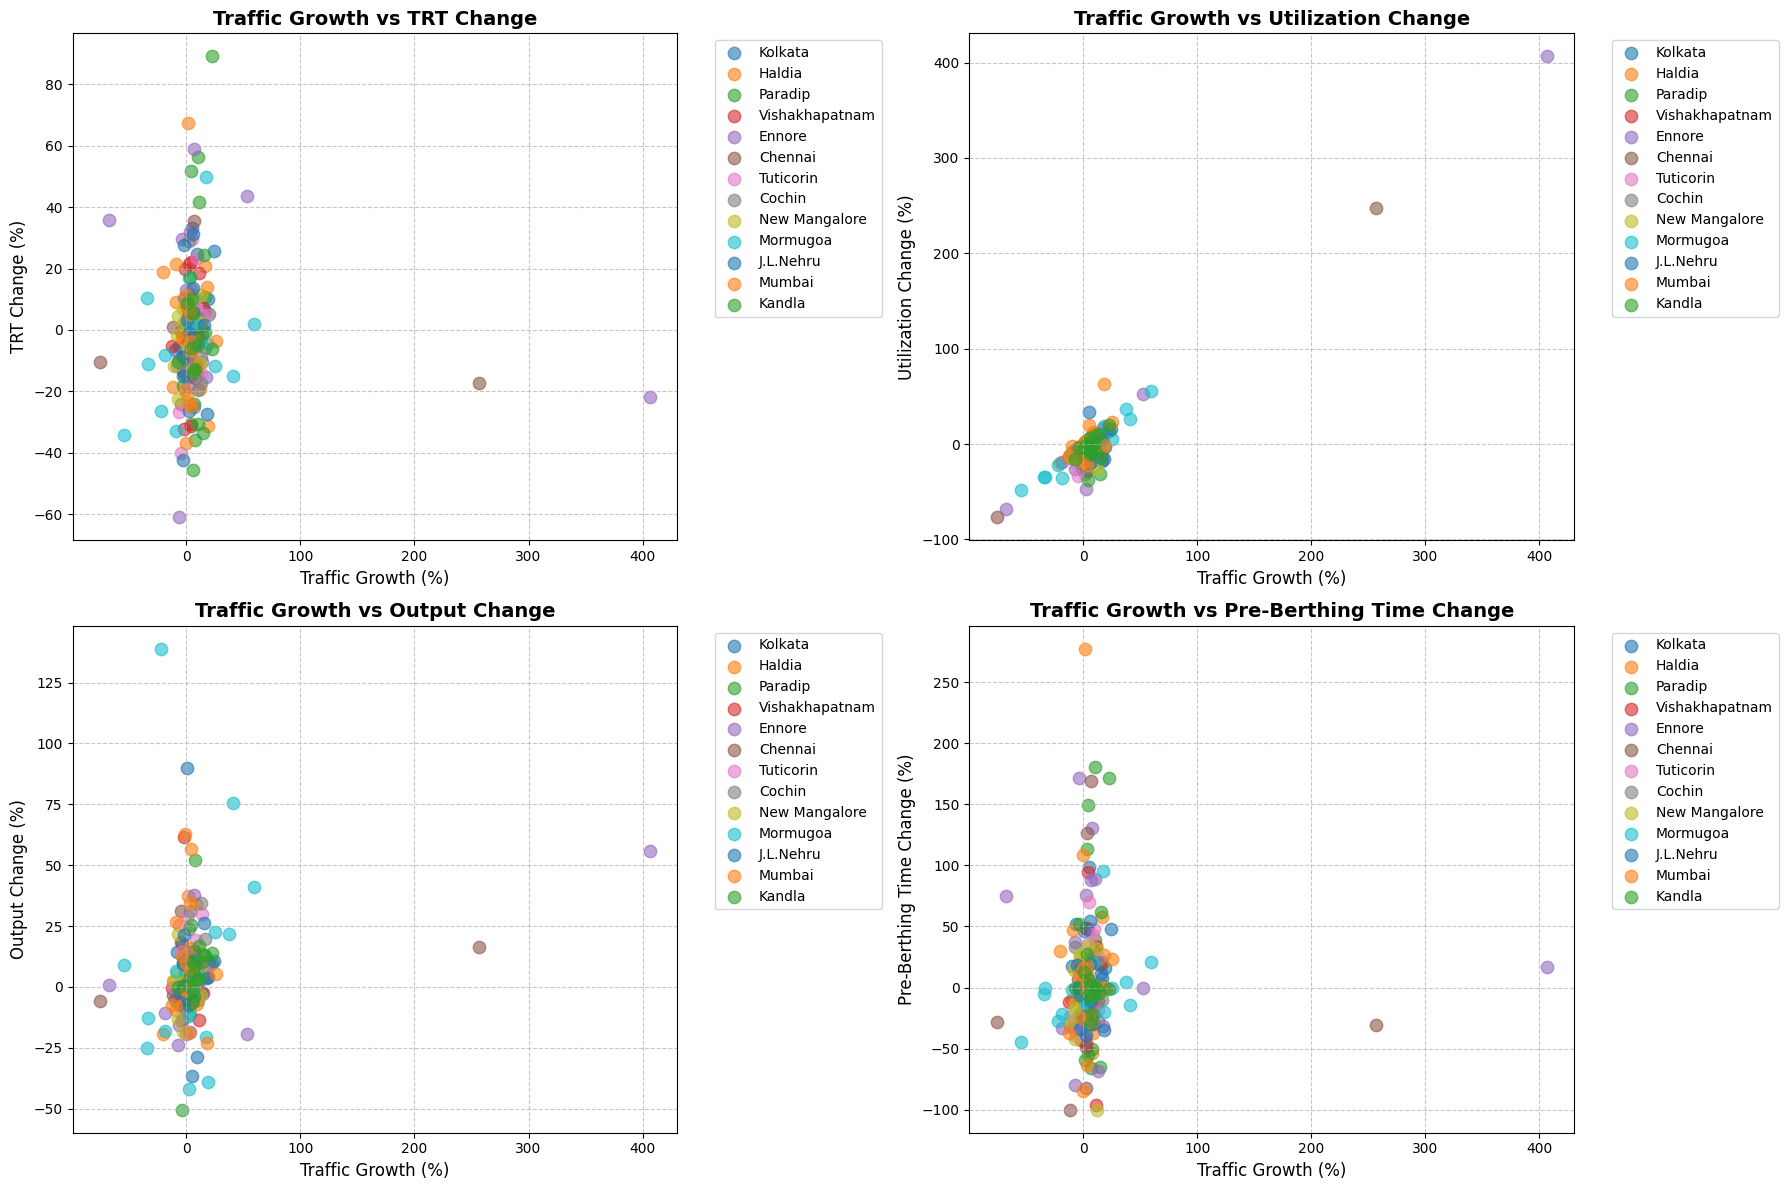

In [ ]:
def analyze_traffic_impact(traffic_df, trt_df, utilization_df, output_df, pre_berthing_df):
    # Calculate year-over-year traffic growth
    traffic_growth = traffic_df.copy()
    for column in traffic_growth.columns:
        if column != 'Year':
            traffic_growth[column] = traffic_growth[column].pct_change() * 100

    # Function to calculate year-over-year change for each metric
    def calculate_metric_change(df):
        metric_change = df.copy()
        for column in metric_change.columns:
            if column != 'Year':
                metric_change[column] = metric_change[column].pct_change() * 100
        return metric_change

    # Calculate changes in each efficiency metric
    trt_change = calculate_metric_change(trt_df)
    utilization_change = calculate_metric_change(utilization_df)
    output_change = calculate_metric_change(output_df)
    pre_berthing_change = calculate_metric_change(pre_berthing_df)

    # Visualization setup for traffic growth vs. efficiency metric changes
    plt.figure(figsize=(18, 12))
    plots = [
        (trt_change, 'TRT Change (%)', 'Traffic Growth vs TRT Change'),
        (utilization_change, 'Utilization Change (%)', 'Traffic Growth vs Utilization Change'),
        (output_change, 'Output Change (%)', 'Traffic Growth vs Output Change'),
        (pre_berthing_change, 'Pre-Berthing Time Change (%)', 'Traffic Growth vs Pre-Berthing Time Change')
    ]

    for idx, (metric_df, ylabel, title) in enumerate(plots, 1):
        plt.subplot(2, 2, idx)
        for port in traffic_growth.columns:
            if port not in ['Year', 'All Ports']:
                # Align data indices and drop NaNs for each port
                x = traffic_growth[port].dropna()
                y = metric_df[port].dropna()
                common_idx = x.index.intersection(y.index)
                plt.scatter(x[common_idx], y[common_idx], alpha=0.6, label=port, s=80)
        plt.xlabel('Traffic Growth (%)', fontsize=12)
        plt.ylabel(ylabel, fontsize=12)
        plt.title(title, fontsize=14, fontweight='bold')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Run the analysis (assuming the DataFrames are already loaded as traffic_df, trt_df, etc.)
analyze_traffic_impact(traffic_df, trt_df, utilization_df, output_df, pre_berthing_df)



Which ports handle traffic most efficiently relative to their size?


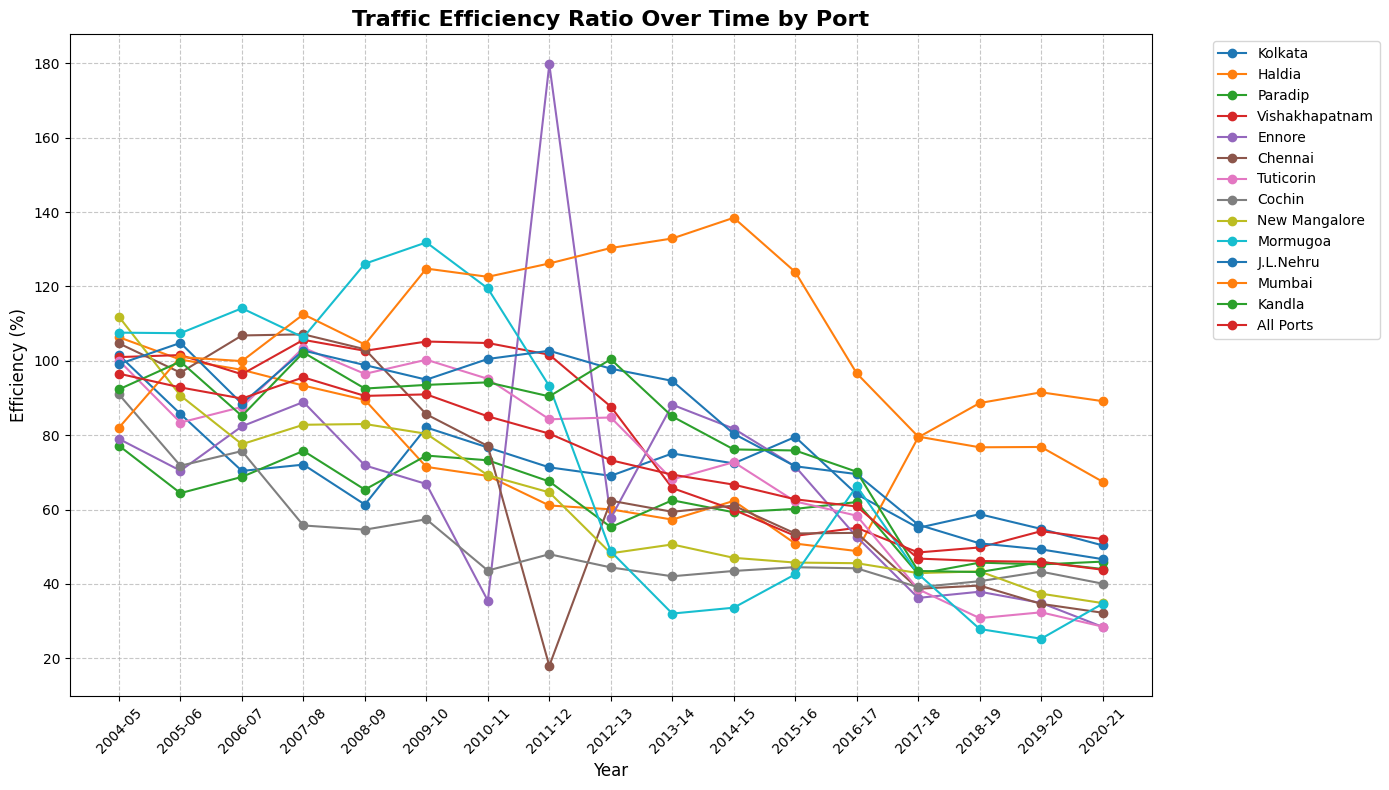

Average Traffic Efficiency Ranking by Port:
Mumbai            105.668580
J.L.Nehru          82.887011
Vishakhapatnam     79.110704
Kandla             78.505149
Haldia             77.462717
Mormugoa           74.110747
All Ports          72.798344
Tuticorin          72.190079
Kolkata            70.614872
Ennore             68.477644
Chennai            66.741325
New Mangalore      62.111525
Paradip            61.518311
Cochin             51.750643
dtype: float64


In [ ]:
def analyze_traffic_efficiency(traffic_df, capacity_df):
    # Time series of efficiency for each port to see trends over years
    plt.figure(figsize=(14, 8))
    for port in efficiency_df.columns:
        if port != 'Year':
            plt.plot(efficiency_df['Year'], efficiency_df[port], label=port, marker='o')

    plt.title('Traffic Efficiency Ratio Over Time by Port', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Efficiency (%)', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return avg_efficiency, efficiency_df

# Example usage (assuming traffic_df and capacity_df are loaded with 'Year' as a column)
avg_efficiency, efficiency_df = analyze_traffic_efficiency(traffic_df, capacity_df)

# Displaying average efficiency ranking
print("Average Traffic Efficiency Ranking by Port:")
print(avg_efficiency)


 Which ports have shown the most significant improvements in key performance indicators over time?


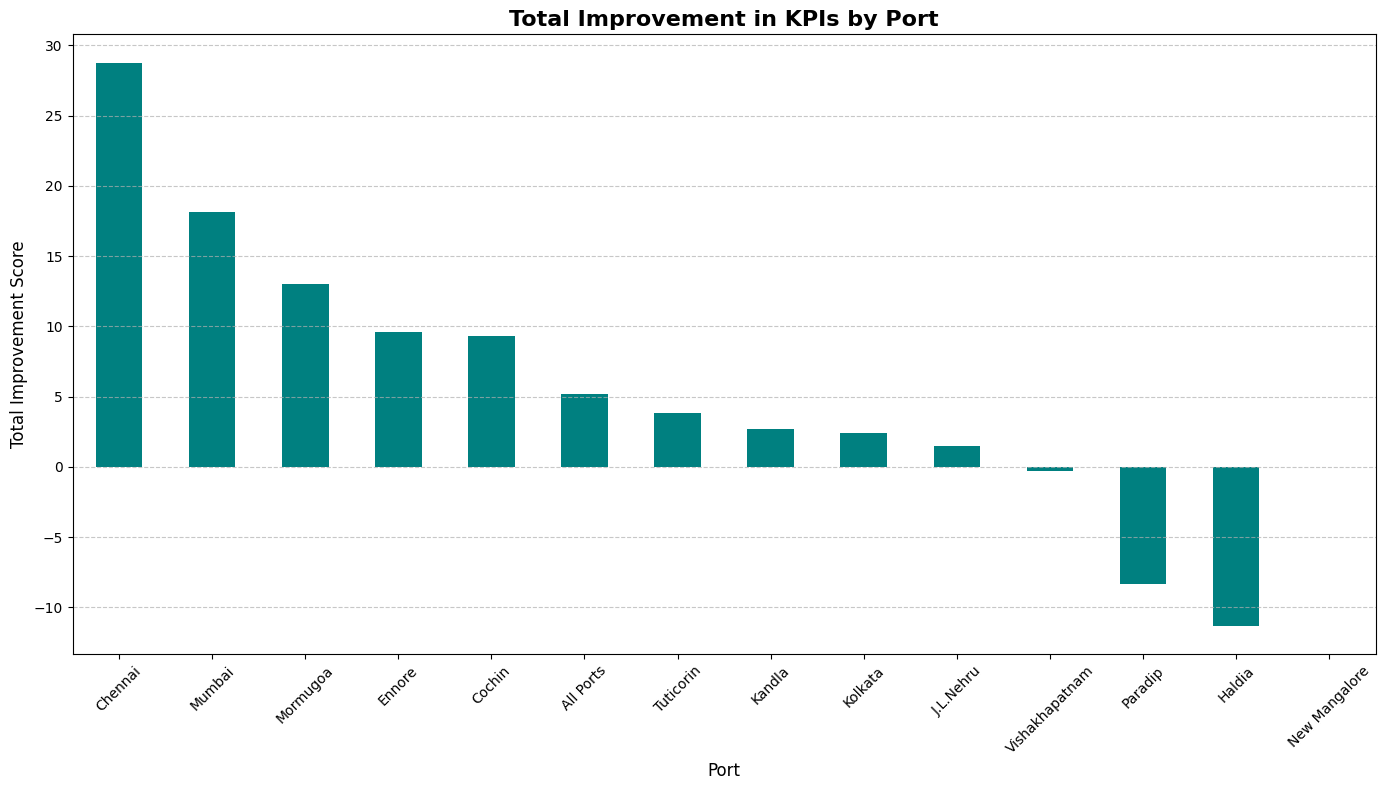

Ranking of Ports by Improvement in KPIs:
                Traffic Growth  TRT Improvement  Utilization Growth  \
Chennai              12.348891         3.563187            5.235161   
Mumbai                2.996846         4.464242           -0.510910   
Mormugoa              2.678334         3.681076           -2.878139   
Ennore               25.426860        -5.074284           14.579746   
Cochin                5.349674         2.947399           -4.318101   
All Ports             3.666802         2.819041           -4.624065   
Tuticorin             4.749661         1.388030           -6.664094   
Kandla                6.946317         1.586782           -3.585141   
Kolkata               3.303256         0.973803           -3.471273   
J.L.Nehru             4.652024         0.715146           -4.208920   
Vishakhapatnam        2.293533         0.383588           -3.643976   
Paradip               8.958005        -2.662085           -2.370393   
Haldia                1.914306      

In [ ]:
def preprocess_df(df):
    """Convert columns to numeric and handle missing values."""
    # Convert 'Year' column to numeric if possible
    if 'Year' in df.columns:
        df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

    for column in df.columns:
        if column != 'Year':
            df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert non-numeric to NaN
            df[column] = df[column].fillna(0)  # Replace NaNs with 0 (or another method if preferred)
    return df

def calculate_kpi_growth(df, metric_name):
    """Calculate year-over-year growth rate for each port in the given DataFrame."""
    growth_df = df.copy()
    for column in growth_df.columns:
        if column != 'Year':
            growth_df[column] = growth_df[column].pct_change() * 100  # Convert to percentage
    return growth_df

def analyze_port_improvements(traffic_df, trt_df, utilization_df, output_df, pre_berthing_df):
    # Preprocess dataframes
    traffic_df = preprocess_df(traffic_df)
    trt_df = preprocess_df(trt_df)
    utilization_df = preprocess_df(utilization_df)
    output_df = preprocess_df(output_df)
    pre_berthing_df = preprocess_df(pre_berthing_df)

    # Verify dataframes are correctly structured
    for df_name, df in zip(['traffic_df', 'trt_df', 'utilization_df', 'output_df', 'pre_berthing_df'],
                           [traffic_df, trt_df, utilization_df, output_df, pre_berthing_df]):
        if 'Year' not in df.columns:
            raise ValueError(f"{df_name} is missing the 'Year' column.")
        if df.isnull().values.any():
            print(f"Warning: {df_name} contains NaN values after preprocessing.")

    # Calculate growth rates for each KPI
    traffic_growth = calculate_kpi_growth(traffic_df, 'Traffic')
    trt_growth = calculate_kpi_growth(trt_df, 'TRT')
    utilization_growth = calculate_kpi_growth(utilization_df, 'Utilization')
    output_growth = calculate_kpi_growth(output_df, 'Output')
    pre_berthing_growth = calculate_kpi_growth(pre_berthing_df, 'Pre-Berthing Detention')

    # Average growth rate for each port across the KPIs
    avg_growth_rates = pd.DataFrame({
        'Traffic Growth': traffic_growth.mean(),
        'TRT Improvement': -trt_growth.mean(),  # Negative for improvement (shorter TRT is better)
        'Utilization Growth': utilization_growth.mean(),
        'Output Growth': output_growth.mean(),
        'Pre-Berthing Improvement': -pre_berthing_growth.mean()  # Negative for improvement
    }).drop('Year')

    # Sort ports by the sum of average growth rates for a performance ranking
    avg_growth_rates['Total Improvement Score'] = avg_growth_rates.sum(axis=1)
    avg_growth_rates = avg_growth_rates.sort_values(by='Total Improvement Score', ascending=False)

    # Visualization of improvements by port
    plt.figure(figsize=(14, 8))
    avg_growth_rates['Total Improvement Score'].plot(kind='bar', color='teal')
    plt.title('Total Improvement in KPIs by Port', fontsize=16, fontweight='bold')
    plt.xlabel('Port', fontsize=12)
    plt.ylabel('Total Improvement Score', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return avg_growth_rates

# Example usage (assuming dataframes are already loaded with 'Year' as a column)
improvement_summary = analyze_port_improvements(traffic_df, trt_df, utilization_df, output_df, pre_berthing_df)

# Displaying ranking of ports by total improvement score
print("Ranking of Ports by Improvement in KPIs:")
print(improvement_summary[['Traffic Growth', 'TRT Improvement', 'Utilization Growth', 'Output Growth', 'Pre-Berthing Improvement', 'Total Improvement Score']])


How do ports on the eastern coast compare with those on the western coast?



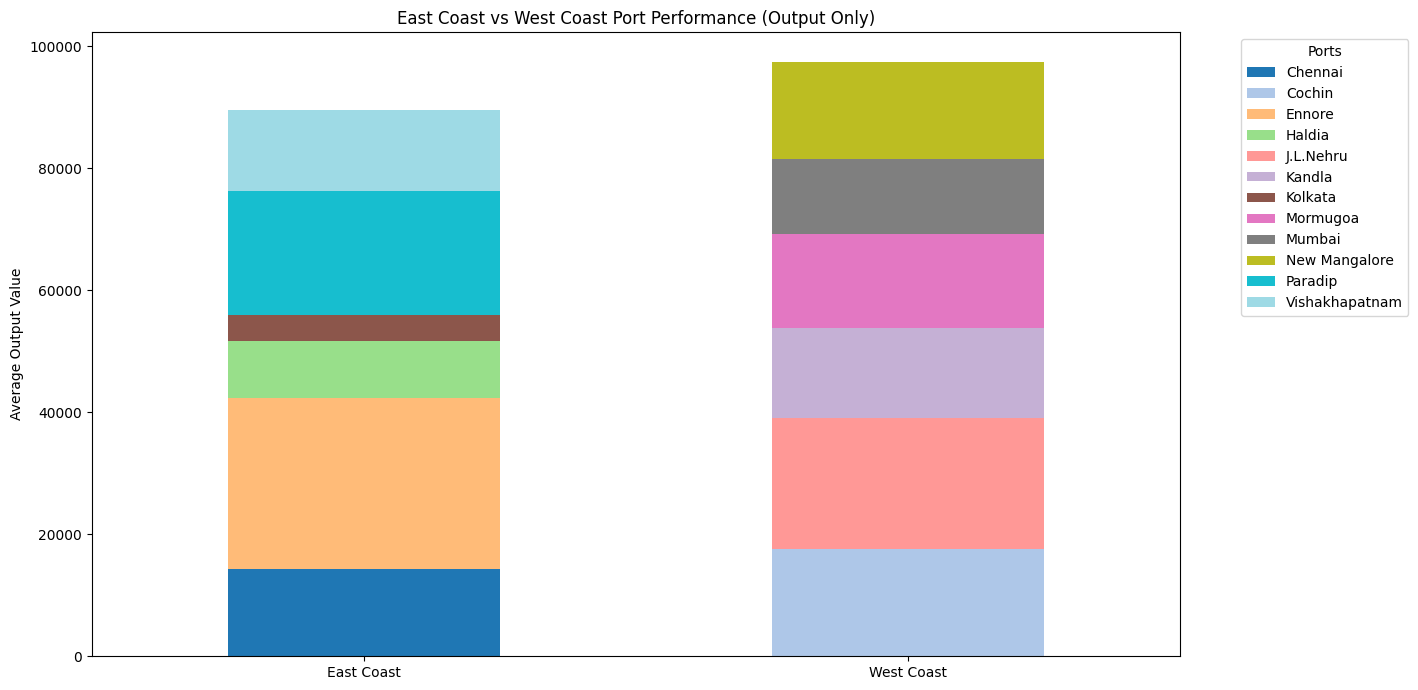

,Chennai,Cochin,Ennore,Haldia,J.L.Nehru,Kandla,Kolkata,Mormugoa,Mumbai,New Mangalore,Paradip,Vishakhapatnam
East Coast,14323.882353,NaN,27947.235294,9444.823529,NaN,NaN,4314.0,NaN,NaN,NaN,20206.588235,13313.235294
West Coast,NaN,17547.235294,NaN,NaN,21493.352941,14735.235294,NaN,15405.411765,12352.941176,15889.470588,NaN,NaN


In [ ]:

def analyze_geographical_performance1(trt_df, output_df, utilization_df):
    """Analyzes performance differences between eastern and western coast ports with a stacked bar graph for individual port contributions."""
    # Define port locations
    east_coast = ['Kolkata', 'Haldia', 'Paradip', 'Vishakhapatnam', 'Ennore', 'Chennai']
    west_coast = ['Kandla', 'Mumbai', 'J.L.Nehru', 'Mormugoa', 'New Mangalore', 'Cochin']

    # Calculate average output for each port
    east_output = output_df[east_coast].mean()
    west_output = output_df[west_coast].mean()

    # Combine into a DataFrame with one row for each coast, each column as a port
    output_comparison = pd.DataFrame({
        'East Coast': east_output,
        'West Coast': west_output
    }).T  # Transpose so that we have "East Coast" and "West Coast" as rows

    # Plot stacked bar chart
    output_comparison.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
    plt.title('East Coast vs West Coast Port Performance (Output Only)')
    plt.ylabel('Average Output Value')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.legend(title="Ports", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    return output_comparison

analyze_geographical_performance1(trt_df, output_df, utilization_df)


What distinguishes the top-performing ports from underperforming ones?


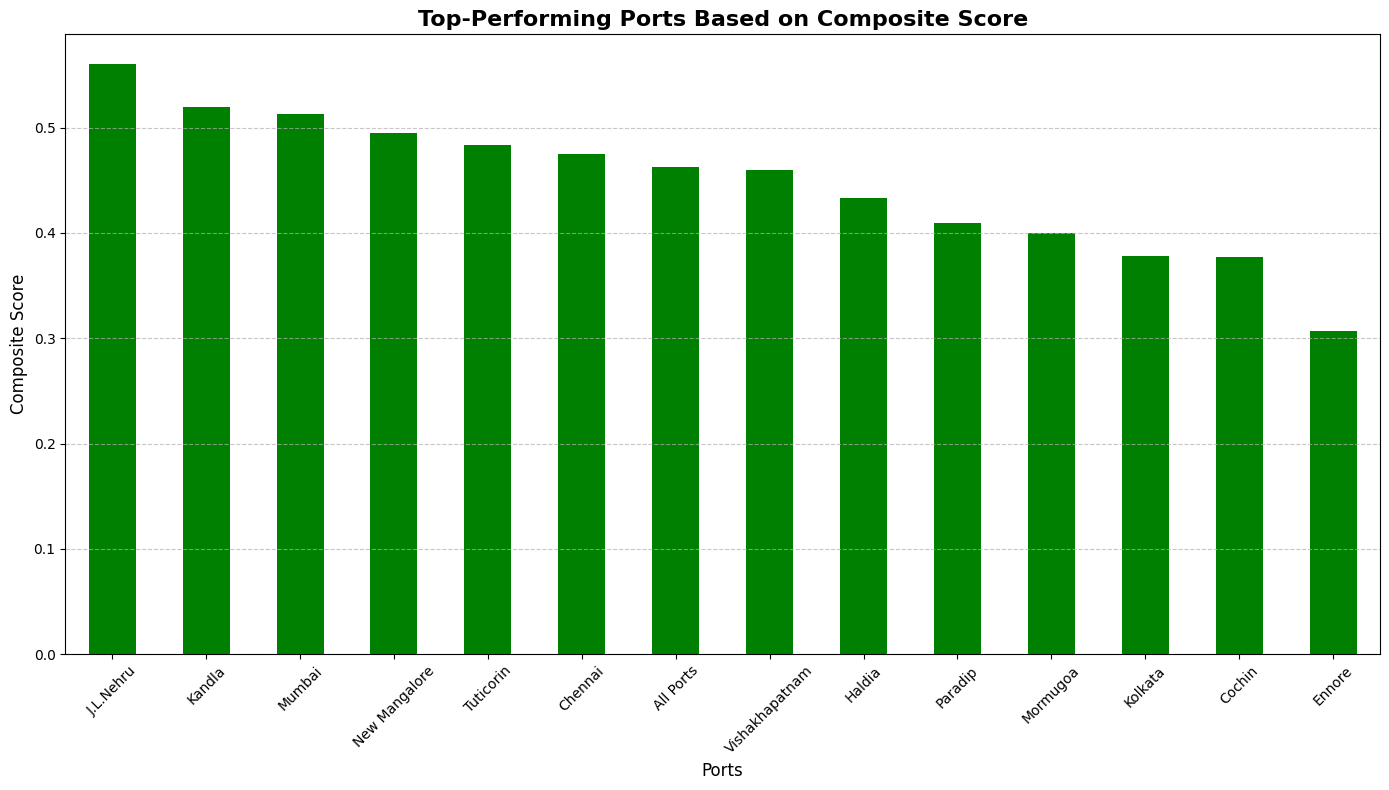

Ports ranked by composite performance:
J.L.Nehru         0.560596
Kandla            0.519163
Mumbai            0.513201
New Mangalore     0.495153
Tuticorin         0.483231
Chennai           0.474521
All Ports         0.462925
Vishakhapatnam    0.460182
Haldia            0.432750
Paradip           0.409179
Mormugoa          0.399519
Kolkata           0.377895
Cochin            0.376888
Ennore            0.307102
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def normalize(df):
    """Normalize each column to a range between 0 and 1, excluding non-numeric columns, and handle NaN values."""
    numeric_df = df.select_dtypes(include=[float, int])  # Ensure only numeric columns are selected
    numeric_df = numeric_df.fillna(numeric_df.mean())  # Fill NaNs with column mean
    normalized_df = (numeric_df - numeric_df.min()) / (numeric_df.max() - numeric_df.min())

    # Add the 'Year' column back if it exists in the original DataFrame
    if 'Year' in df.columns:
        normalized_df['Year'] = df['Year']

    return normalized_df

def preprocess(df):
    """Preprocess the data to handle missing values and ensure all columns are numeric."""
    # Convert all columns to numeric, forcing errors to NaN
    df = df.apply(pd.to_numeric, errors='coerce')
    # Fill NaN values with column mean
    df = df.fillna(df.mean())
    return df

def calculate_composite_score(trt_df, output_df, utilization_df, pre_berthing_df):
    """Calculate composite score for each port based on multiple metrics."""
    # Preprocess and handle missing values
    trt_df = preprocess(trt_df)
    output_df = preprocess(output_df)
    utilization_df = preprocess(utilization_df)
    pre_berthing_df = preprocess(pre_berthing_df)

    # Normalize each metric
    trt_normalized = normalize(trt_df)
    output_normalized = normalize(output_df)
    utilization_normalized = normalize(utilization_df)
    pre_berthing_normalized = normalize(pre_berthing_df)

    # Composite Score formula
    composite_score = (0.30 * trt_normalized) + (0.30 * output_normalized) + \
                      (0.25 * utilization_normalized) + (0.15 * pre_berthing_normalized)
    composite_score = composite_score.drop(columns=['Year'], errors='ignore')  # Drop 'Year' from final score calculation

    return composite_score

def rank_ports_by_performance(composite_score):
    """Rank ports by composite score."""
    scores = composite_score.mean(axis=0)  # Average score across years
    ranked_ports = scores.sort_values(ascending=False)  # Highest to lowest
    return ranked_ports

def visualize_port_performance(ranked_ports):
    """Visualize top and underperforming ports."""
    if ranked_ports.empty:
        print("Error: No data to display in the ranking.")
        return

    plt.figure(figsize=(14, 8))
    ranked_ports.plot(kind='bar', color='green')
    plt.title('Top-Performing Ports Based on Composite Score', fontsize=16, fontweight='bold')
    plt.xlabel('Ports', fontsize=12)
    plt.ylabel('Composite Score', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Calculate composite scores
composite_scores = calculate_composite_score(trt_df, output_df, utilization_df, pre_berthing_df)

# Rank the ports based on composite score
ranked_ports = rank_ports_by_performance(composite_scores)


# Visualize the top-performing ports
visualize_port_performance(ranked_ports)

# Print out the ranked ports
print("Ports ranked by composite performance:")
print(ranked_ports)

average traffic growth of all major ports over the year

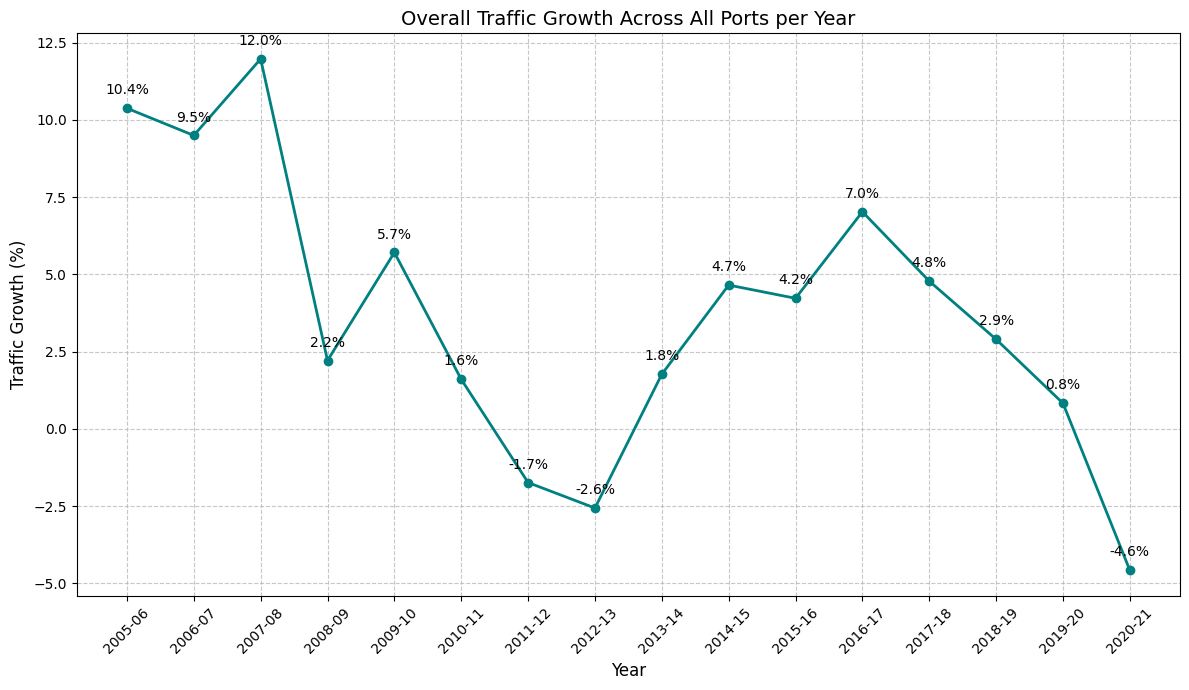

In [ ]:
"""average traffic growth of all major ports over the year"""

def analyze_overall_traffic_growth(traffic_df):
    """Calculates and plots the overall traffic growth per year across all ports."""

    # Sum traffic for all individual ports (excluding 'Year')
    traffic_df['Total Traffic'] = traffic_df.drop(columns='Year').sum(axis=1)

    # Calculate year-over-year growth for the total traffic across all ports
    traffic_df['Traffic Growth'] = traffic_df['Total Traffic'].pct_change() * 100  # Growth in percentage

    # Plot the overall traffic growth per year
    plt.figure(figsize=(12, 7))
    plt.plot(traffic_df['Year'], traffic_df['Traffic Growth'], marker='o', color='teal', linewidth=2)

    # Enhance the plot
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Traffic Growth (%)', fontsize=12)
    plt.title('Overall Traffic Growth Across All Ports per Year', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add data labels for each point
    for x, y in zip(traffic_df['Year'], traffic_df['Traffic Growth']):
        if not pd.isna(y):  # Only label non-NaN values
            plt.annotate(f'{y:.1f}%',
                         (x, y),
                         textcoords="offset points",
                         xytext=(0,10),
                         ha='center')

    plt.tight_layout()
    plt.show()
analyze_overall_traffic_growth(traffic_df)